# Modeling diffusion using coin flips 

In [1]:
# For numerical computation
import numpy as np
import scipy.stats

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Import interactive library
import panel as pn

# This enables SVG graphics inline
%config InlineBackend.figure_format = 'retina'


sns.set()
pn.extension()

How to generate a random number in Python?

In [2]:
np.random.rand(4, 4)

array([[0.44351505, 0.65923517, 0.79640693, 0.17286192],
       [0.08014419, 0.56763192, 0.82207261, 0.44707601],
       [0.61322168, 0.45434435, 0.23756485, 0.50822723],
       [0.27953302, 0.67685581, 0.72688789, 0.28129332]])

Let's generate our very first random walk!

Text(0, 0.5, 'position (a.u.)')

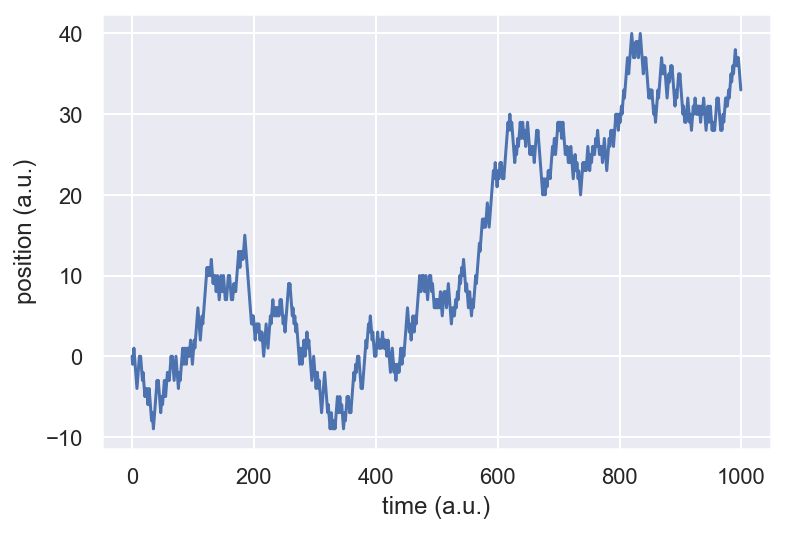

In [3]:
# Define number of steps
n_steps = 1000

# Initialize array to save position
position = np.zeros(n_steps)

# Define probability of heads
p = 0.5

# Loop through positions
for i in np.arange(1, n_steps):
    # generate random number
    rand = np.random.rand()
    
    # Use if statement to update position
    if rand < p:
        position[i] = position[i-1] - 1
    
    else:
        position[i] = position[i-1] + 1

# Plot the trajectory
plt.plot(position)
plt.xlabel('time (a.u.)')
plt.ylabel('position (a.u.)')

## Average behavior over ensemble of trajectories

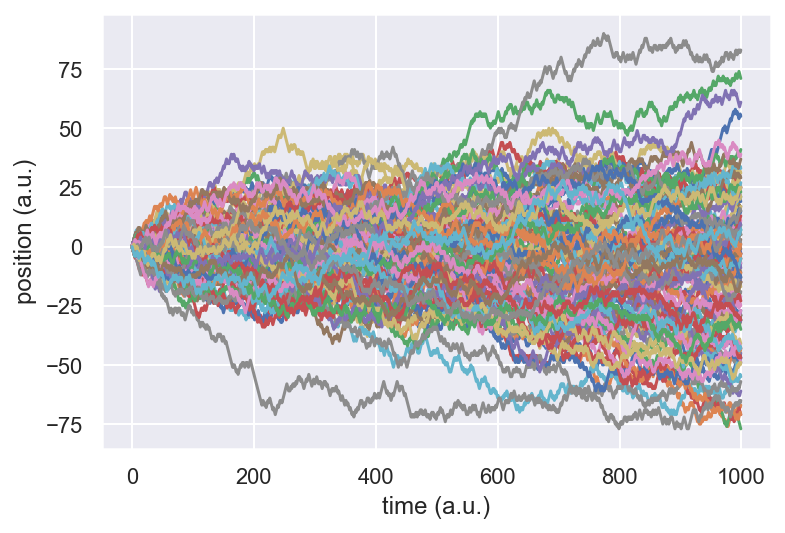

In [4]:
# Define number of trajectories to simulate
n_sim = 100
# Define number of steps
n_steps = 1000

# Initalize array to save trajectories
positions = np.zeros([n_sim, n_steps])

# 1. Loop through simulations
for i in np.arange(n_sim):
    # 2. Loop through positions
    for j in np.arange(1, n_steps):
        # generate random number
        rand = np.random.rand()

        # Use if statement to update positions
        if rand < p:
            positions[i, j] = positions[i, j-1] - 1

        else:
            positions[i, j] = positions[i, j-1] + 1
            
# Plot trajectories
plt.plot(np.arange(n_steps), positions.T)
plt.xlabel('time (a.u.)')
plt.ylabel('position (a.u.)');

Let's check the average position $\langle x \rangle$

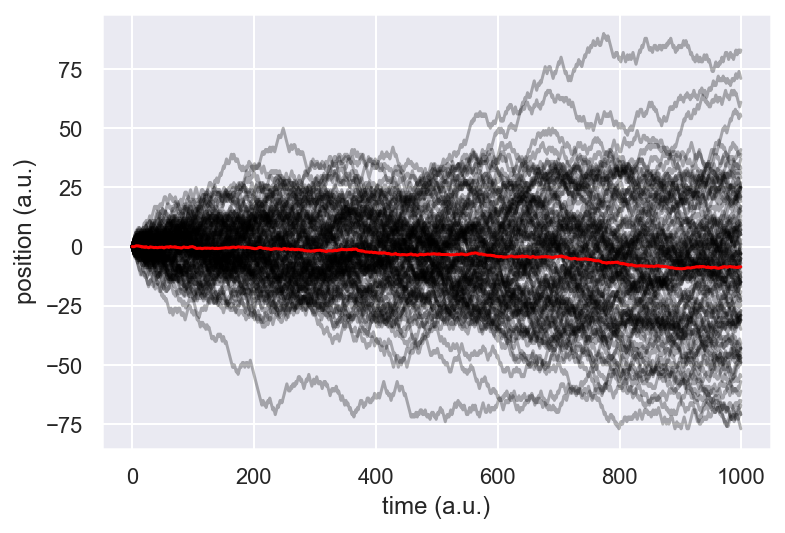

In [5]:
# Compute mean trajectory
mean_pos = np.mean(positions, axis=0)

# Plot trajectories
plt.plot(np.arange(n_steps), positions.T,
         color='black', alpha=0.3)
# Plot mean trajectory
plt.plot(np.arange(n_steps), mean_pos,
         color='red')

plt.xlabel('time (a.u.)')
plt.ylabel('position (a.u.)');

Let's now test the prediction for $\langle x^2 \rangle$

Text(0, 0.5, 'mean square displacement')

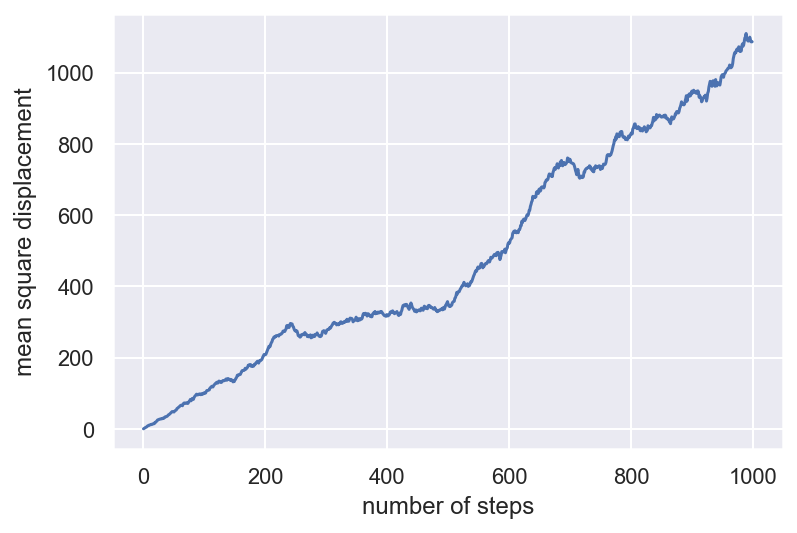

In [6]:
mean_sqr_pos = np.mean(positions**2, axis=0)

plt.plot(np.arange(n_steps), mean_sqr_pos)
plt.xlabel('number of steps')
plt.ylabel('mean square displacement')

We'll now take a slice in time and plot a histogram

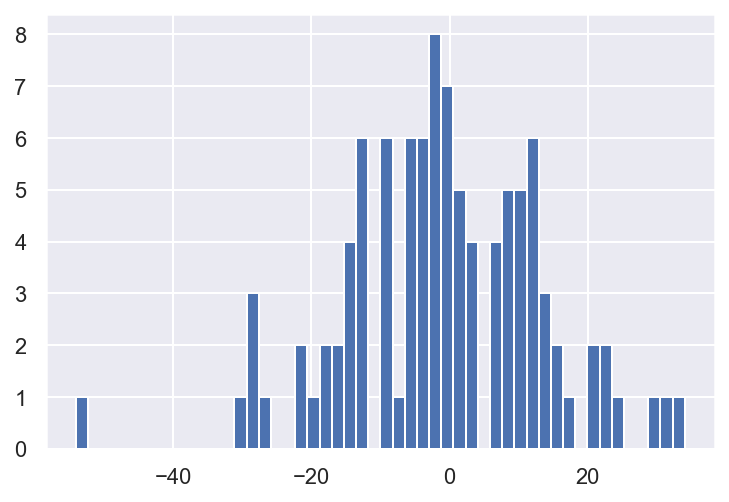

In [7]:
# Extract time slice
pos_slice = positions[:, 200]

plt.hist(pos_slice, bins=50);

Plot mean plus variance for trajectories

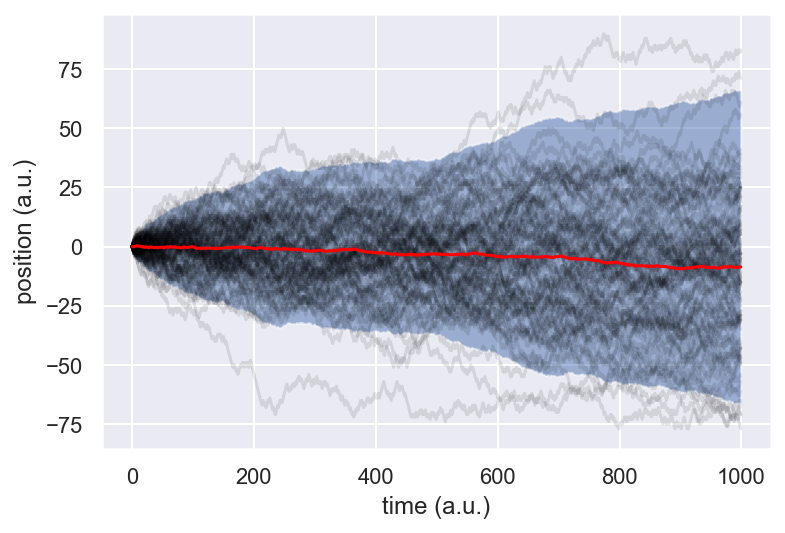

In [8]:
# Plot variance in position as a shaded region
plt.fill_between(np.arange(n_steps),
                 -2 * np.sqrt(mean_sqr_pos),
                 2 * np.sqrt(mean_sqr_pos),
                 alpha=0.5)

# Plot trajectories
plt.plot(np.arange(n_steps), positions.T,
         color='black', alpha=0.1)
# Plot mean trajectory
plt.plot(np.arange(n_steps), mean_pos,
         color='red')

plt.xlabel('time (a.u.)')
plt.ylabel('position (a.u.)');

Row
    [0] ParamFunction(function)
    [1] Column
        [0] FloatSlider(end=1, name='p', start=0, step=0.05, value=0.5)
        [1] IntSlider(end=100, name='number of simulations', start=1, value=10)
        [2] IntSlider(end=1000, name='number of steps', start=10, step=10, value=50)
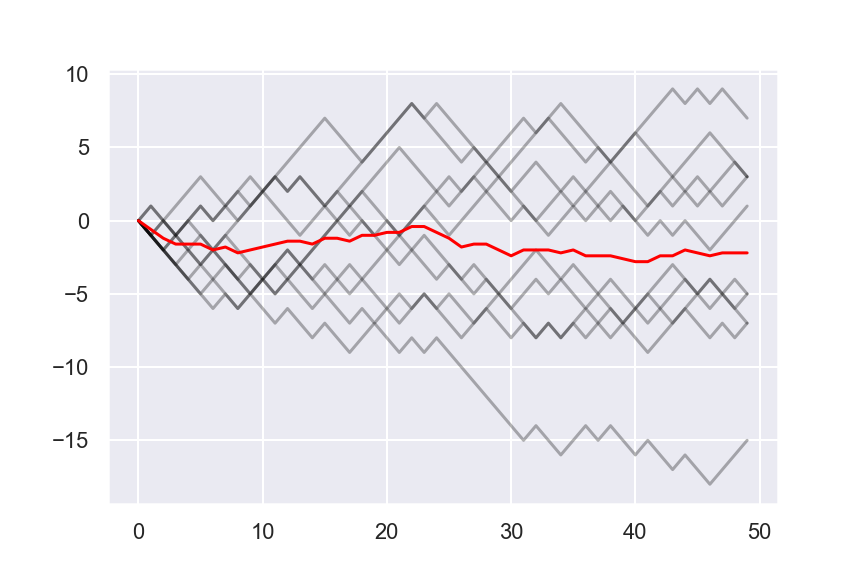

In [9]:
# Define slider for coin bias
p_slider = pn.widgets.FloatSlider(
    name='p',
    start=0,
    end=1,
    step=0.05,
    value=0.5
)

# Define slider for number of simulations
n_sim_slider = pn.widgets.IntSlider(
    name='number of simulations',
    start=1,
    end=100,
    step=1,
    value=10
)

# Define the number of steps slider
n_step_slider = pn.widgets.IntSlider(
    name='number of steps',
    start=10,
    end=1000,
    step=10,
    value=50
)

@pn.depends(p_slider.param.value,
            n_sim_slider.param.value,
            n_step_slider.param.value)
def interact_random(p, n_sim, n_steps):
    # Initalize array to save trajectories
    positions = np.zeros([n_sim, n_steps])

    # 1. Loop through simulations
    for i in np.arange(n_sim):
        # 2. Loop through positions
        for j in np.arange(1, n_steps):
            # generate random number
            rand = np.random.rand()
            # Use if statement to update positions
            if rand < p:
                positions[i, j] = positions[i, j-1] - 1

            else:
                positions[i, j] = positions[i, j-1] + 1
    # Compute mean trajectory
    mean_pos = np.mean(positions, axis=0)
    # Initalize plot
    fig, ax = plt.subplots(1, 1)
    # Plot trajectories
    ax.plot(np.arange(n_steps), positions.T,
             color='black', alpha=0.3)
    # Plot mean trajectory
    ax.plot(np.arange(n_steps), mean_pos,
             color='red')
    
    plt.close(fig)
    return fig

pn.Row(
    interact_random,
    pn.Column(
        p_slider,
        n_sim_slider,
        n_step_slider
    )
)